# Learning Rate Schedule & Adaptive Gradient Descent Algorithm

* A CNN model is constructed to train on CIFAR-10

* The following learning rate decay schedules are used : constant learning rate, time-based decay, step decay, exponential decay

* The following adaptive graident descent algorithms are used : Adagrad, Adadelta, RMSProp, Adam
    
* Model performance of using different learning rate schedules or adaptive gradient descent algorithms are compared

In [6]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline  

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler

# Load CIFAR-10 data

In [8]:
batch_size = 64
num_classes = 2
epochs = 100

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

X_train = X_train[train_picks]
X_test = X_test[test_picks]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


# Define function to construct CNN model

In [9]:
def cnn_model() : 
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # print(model.summary())
    return(model)

# Adaptive gradient descent algorithms : Adagrad, Adadelta, RMSprop, Adam

In [10]:
# fit CNN model using Adagrad optimizer
model1 = cnn_model()
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adadelta optimizer
model2 = cnn_model()
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using RMSprop optimizer
model3 = cnn_model()
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adam optimizer
model4 = cnn_model()
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 1s - loss: 0.6933 - acc: 0.4960 - val_loss: 0.6926 - val_acc: 0.5085
Epoch 2/100
 - 1s - loss: 0.6842 - acc: 0.5560 - val_loss: 0.6666 - val_acc: 0.5830
Epoch 3/100
 - 1s - loss: 0.6648 - acc: 0.6013 - val_loss: 0.6576 - val_acc: 0.6320
Epoch 4/100
 - 1s - loss: 0.6506 - acc: 0.6219 - val_loss: 0.6379 - val_acc: 0.6515
Epoch 5/100
 - 1s - loss: 0.6418 - acc: 0.6372 - val_loss: 0.6335 - val_acc: 0.6560
Epoch 6/100
 - 1s - loss: 0.6314 - acc: 0.6477 - val_loss: 0.6242 - val_acc: 0.6540
Epoch 7/100
 - 1s - loss: 0.6301 - acc: 0.6484 - val_loss: 0.6228 - val_acc: 0.6540
Epoch 8/100
 - 1s - loss: 0.6241 - acc: 0.6550 - val_loss: 0.6180 - val_acc: 0.6655
Epoch 9/100
 - 1s - loss: 0.6205 - acc: 0.6563 - val_loss: 0.6144 - val_acc: 0.6670
Epoch 10/100
 - 1s - loss: 0.6163 - acc: 0.6603 - val_loss: 0.6114 - val_acc: 0.6745
Epoch 11/100
 - 1s - loss: 0.6130 - acc: 0.6668 - val_loss: 0.6093 - val_acc: 0.6740
Epoch 12/100
 - 1s - loss

Epoch 97/100
 - 1s - loss: 0.5097 - acc: 0.7514 - val_loss: 0.5509 - val_acc: 0.7155
Epoch 98/100
 - 1s - loss: 0.5086 - acc: 0.7429 - val_loss: 0.5504 - val_acc: 0.7160
Epoch 99/100
 - 1s - loss: 0.5100 - acc: 0.7455 - val_loss: 0.5501 - val_acc: 0.7175
Epoch 100/100
 - 1s - loss: 0.5048 - acc: 0.7505 - val_loss: 0.5520 - val_acc: 0.7080
Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 1s - loss: 0.6872 - acc: 0.5413 - val_loss: 0.6696 - val_acc: 0.5990
Epoch 2/100
 - 1s - loss: 0.6699 - acc: 0.5874 - val_loss: 0.6682 - val_acc: 0.5895
Epoch 3/100
 - 1s - loss: 0.6571 - acc: 0.6130 - val_loss: 0.6424 - val_acc: 0.6355
Epoch 4/100
 - 1s - loss: 0.6438 - acc: 0.6343 - val_loss: 0.6327 - val_acc: 0.6470
Epoch 5/100
 - 1s - loss: 0.6350 - acc: 0.6425 - val_loss: 0.6324 - val_acc: 0.6385
Epoch 6/100
 - 1s - loss: 0.6301 - acc: 0.6500 - val_loss: 0.6116 - val_acc: 0.6655
Epoch 7/100
 - 1s - loss: 0.6198 - acc: 0.6542 - val_loss: 0.6073 - val_acc: 0.6780
Epoch 8/100
 - 1s - lo

Epoch 93/100
 - 1s - loss: 0.4709 - acc: 0.7624 - val_loss: 0.5502 - val_acc: 0.7205
Epoch 94/100
 - 1s - loss: 0.4719 - acc: 0.7590 - val_loss: 0.5622 - val_acc: 0.7135
Epoch 95/100
 - 1s - loss: 0.4694 - acc: 0.7633 - val_loss: 0.5470 - val_acc: 0.7225
Epoch 96/100
 - 1s - loss: 0.4673 - acc: 0.7703 - val_loss: 0.5668 - val_acc: 0.7180
Epoch 97/100
 - 1s - loss: 0.4606 - acc: 0.7698 - val_loss: 0.5516 - val_acc: 0.7200
Epoch 98/100
 - 1s - loss: 0.4632 - acc: 0.7727 - val_loss: 0.5550 - val_acc: 0.7225
Epoch 99/100
 - 1s - loss: 0.4646 - acc: 0.7694 - val_loss: 0.5442 - val_acc: 0.7280
Epoch 100/100
 - 1s - loss: 0.4669 - acc: 0.7653 - val_loss: 0.5488 - val_acc: 0.7310
Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 1s - loss: 0.6951 - acc: 0.5260 - val_loss: 0.6810 - val_acc: 0.5870
Epoch 2/100
 - 1s - loss: 0.6770 - acc: 0.5673 - val_loss: 0.6682 - val_acc: 0.6050
Epoch 3/100
 - 1s - loss: 0.6699 - acc: 0.5724 - val_loss: 0.6565 - val_acc: 0.6215
Epoch 4/100
 - 1s 

Epoch 89/100
 - 1s - loss: 0.4477 - acc: 0.7707 - val_loss: 0.6062 - val_acc: 0.7145
Epoch 90/100
 - 1s - loss: 0.4505 - acc: 0.7792 - val_loss: 0.5890 - val_acc: 0.7185
Epoch 91/100
 - 1s - loss: 0.4482 - acc: 0.7802 - val_loss: 0.6205 - val_acc: 0.7140
Epoch 92/100
 - 1s - loss: 0.4517 - acc: 0.7699 - val_loss: 0.5777 - val_acc: 0.7170
Epoch 93/100
 - 1s - loss: 0.4422 - acc: 0.7819 - val_loss: 0.5744 - val_acc: 0.7070
Epoch 94/100
 - 1s - loss: 0.4446 - acc: 0.7797 - val_loss: 0.5812 - val_acc: 0.7125
Epoch 95/100
 - 1s - loss: 0.4398 - acc: 0.7801 - val_loss: 0.5730 - val_acc: 0.7185
Epoch 96/100
 - 1s - loss: 0.4396 - acc: 0.7735 - val_loss: 0.5920 - val_acc: 0.7170
Epoch 97/100
 - 1s - loss: 0.4471 - acc: 0.7781 - val_loss: 0.5596 - val_acc: 0.7155
Epoch 98/100
 - 1s - loss: 0.4440 - acc: 0.7773 - val_loss: 0.6201 - val_acc: 0.7235
Epoch 99/100
 - 1s - loss: 0.4491 - acc: 0.7762 - val_loss: 0.5695 - val_acc: 0.7060
Epoch 100/100
 - 1s - loss: 0.4475 - acc: 0.7808 - val_loss: 0.56

Epoch 85/100
 - 1s - loss: 0.4080 - acc: 0.7869 - val_loss: 0.6103 - val_acc: 0.7085
Epoch 86/100
 - 1s - loss: 0.4174 - acc: 0.7777 - val_loss: 0.6072 - val_acc: 0.6985
Epoch 87/100
 - 1s - loss: 0.4142 - acc: 0.7850 - val_loss: 0.6096 - val_acc: 0.7070
Epoch 88/100
 - 1s - loss: 0.4093 - acc: 0.7841 - val_loss: 0.6123 - val_acc: 0.6980
Epoch 89/100
 - 1s - loss: 0.4128 - acc: 0.7788 - val_loss: 0.6170 - val_acc: 0.6990
Epoch 90/100
 - 1s - loss: 0.4089 - acc: 0.7866 - val_loss: 0.6074 - val_acc: 0.7045
Epoch 91/100
 - 1s - loss: 0.4078 - acc: 0.7886 - val_loss: 0.6194 - val_acc: 0.7090
Epoch 92/100
 - 1s - loss: 0.4064 - acc: 0.7912 - val_loss: 0.6020 - val_acc: 0.7090
Epoch 93/100
 - 1s - loss: 0.4081 - acc: 0.7843 - val_loss: 0.6279 - val_acc: 0.7055
Epoch 94/100
 - 1s - loss: 0.4045 - acc: 0.7882 - val_loss: 0.6201 - val_acc: 0.7060
Epoch 95/100
 - 1s - loss: 0.3984 - acc: 0.7853 - val_loss: 0.6234 - val_acc: 0.7050
Epoch 96/100
 - 1s - loss: 0.4037 - acc: 0.7854 - val_loss: 0.634

# Compare model accuracy

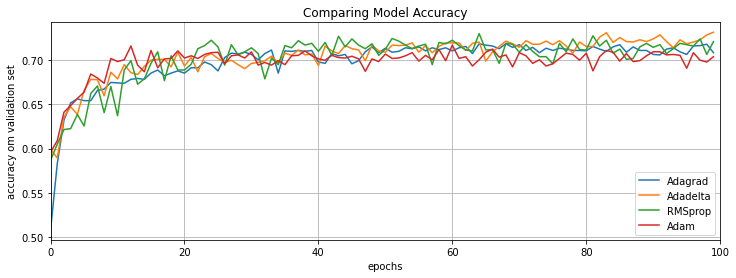

In [11]:
fig = plt.figure(figsize=(12,4))
plt.plot(range(epochs),history1.history['val_acc'],label='Adagrad')
plt.plot(range(epochs),history2.history['val_acc'],label='Adadelta')
plt.plot(range(epochs),history3.history['val_acc'],label='RMSprop')
plt.plot(range(epochs),history4.history['val_acc'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig('img/compare-accuracy.jpg')
plt.close(fig)